In [24]:
import os
import glob
import numpy as np
import pandas as pd
import geopandas as gpd

import cartopy.feature as cf
import cartopy.crs as ccrs

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [25]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Brazil','UCAR')

In [26]:
year = 2020

In [27]:
file_list = glob.glob(os.path.join(dir_base,'raw','6h',str(year),'*.csv'))
file_list = sorted(file_list)
file_len = len(file_list)
print(f'Number of files: {file_len}')

Number of files: 28


In [28]:
for pos in range(file_len):#file_len
    REF = pd.read_csv(file_list[pos])
    REF['is_valid'] = REF['Precip'] != -888888.0
    REF_sorted = REF.sort_values(by='is_valid', ascending=False)
    REF_clear = REF_sorted.drop_duplicates(subset=['Latitude', 'Longitude'], keep='first')
    REF_clear = REF_clear.drop(columns='is_valid')
    REF_clear = REF_clear.reset_index(drop=True)
    # print(len(REF),len(REF_clear))

Text(1.0, 1.0, '2020')

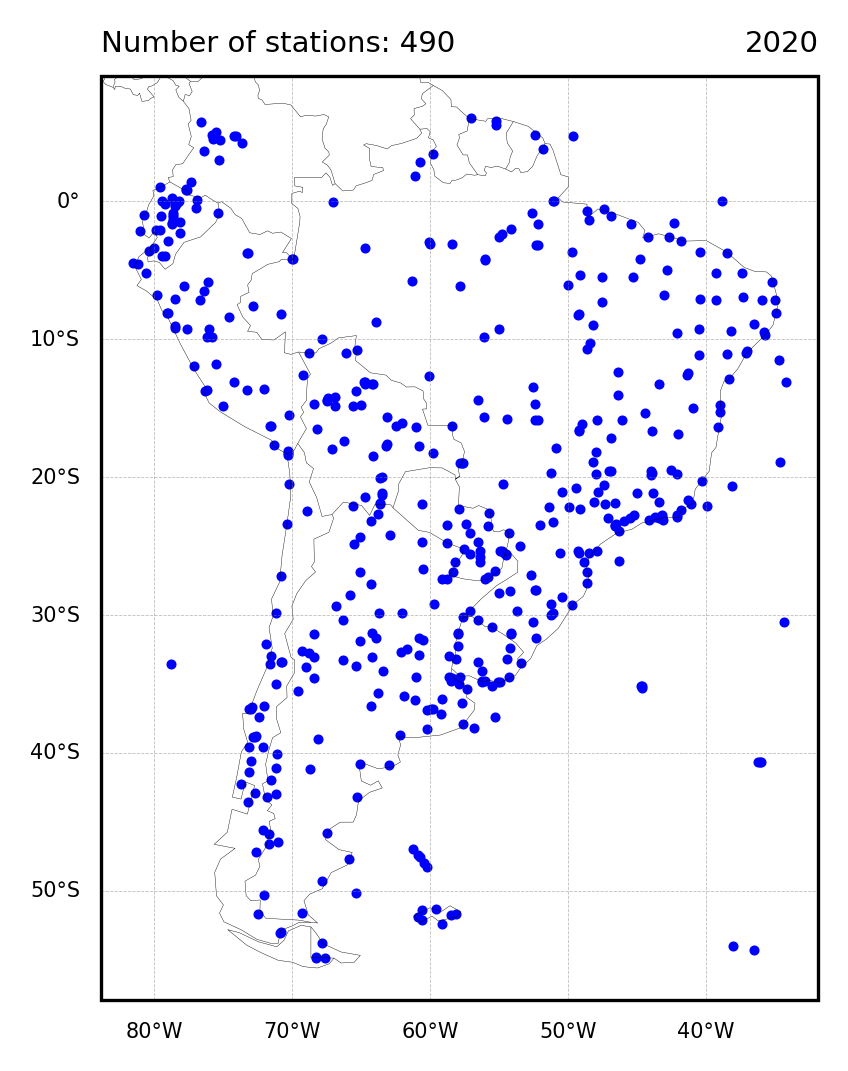

In [29]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

#==================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
# ax1.set_extent([SP_lon_min, SP_lon_max, SP_lat_min, SP_lat_max],crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.1, linestyle='-', edgecolor='k')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 5, 'color': 'k'}
gl.ylabel_style = {'size': 5, 'color': 'k'}

ax1.scatter(REF_clear['Longitude'],REF_clear['Latitude'],s=2,marker='o',color='b',transform=proj)

ax1.set_title(f'Number of stations: {len(REF_clear)}', loc='left', fontsize=7)
ax1.set_title(f'{year}', loc='right', fontsize=7)

In [31]:
REF_clear.columns

Index(['Latitude', 'Longitude', 'ID', 'Name', 'Platform (FM‑Code)', 'Source',
       'Elevation', 'Valid fields', 'Num. errors', 'Num. warnings',
       'Sequence number', 'Num. duplicates', 'Is sounding?', 'Is bogus?',
       'Discard?', 'Unix time', 'Julian day', 'Date', 'SLP', 'SLP-QC',
       'Ref Pressure', 'Ref Pressure-QC', 'Precip', 'Precip-QC', 'Daily Max T',
       'Daily Max T-QC', 'Daily Min T', 'Daily Min T-QC', 'Night Min T',
       'Night Min T-QC', '3hr Pres Change', '3hr Pres Change-QC',
       '24hr Pres Change', '24hr Pres Change-QC', 'Cloud cover',
       'Cloud cover-QC', 'Ceiling', 'Ceiling-QC', 'Precipitable water',
       'Precipitable water-QC', 'Pressure (Pa)', 'Pressure (Pa)-QC',
       'Height (m)', 'Height (m)-QC', 'Temperature (K)', 'Temperature (K)-QC',
       'Dew point (K)', 'Dew point (K)-QC', 'Wind speed (m/s)',
       'Wind speed (m/s)-QC', 'Wind direction (deg)',
       'Wind direction (deg)-QC', 'Wind U (m/s)', 'Wind U (m/s)-QC',
       'Wind V (m/

In [ ]:
for file_ in range(file_len):#file_len
    REF = pd.read_csv(file_list[pos])
    REF['is_valid'] = REF['Precip'] != -888888.0
    REF_sorted = REF.sort_values(by='is_valid', ascending=False)
    REF_clear = REF_sorted.drop_duplicates(subset=['Latitude', 'Longitude'], keep='first')
    REF_clear = REF_clear.drop(columns='is_valid')
    REF_clear = REF_clear.reset_index(drop=True)
    time_ = file_list[file_].split('/')[-1].split(':')[-1].split('.')[0]

    ID, LAT, LON = [], [], []
    YY, MM, DD, HH = [], [], [], []
    PR, PW, TMP = [], [], []
    for station in range(len(REF_clear)):
        id_ = REF_clear['ID'][station].replace('      get data information here.','')
        id_ = id_.replace(" ", "")
        lat_ = REF_clear['Latitude'][station]
        lon_ = REF_clear['Longitude'][station]
        pre_ = REF_clear['Precip'][station]
        prew_ = REF_clear['Precipitable water'][station]
        tmp_ = REF_clear['Daily Min T'][station]
        # print(f'File: {id_}')

        ID.append(id_)
        LAT.append(float(lat_))
        LON.append(float(lon_))
        YY.append(pd.to_datetime(time_, format="%Y%m%d%H").year)
        MM.append(pd.to_datetime(time_, format="%Y%m%d%H").month)
        DD.append(pd.to_datetime(time_, format="%Y%m%d%H").day)
        HH.append(pd.to_datetime(time_, format="%Y%m%d%H").hour)
        PR.append(pre_)
        PW.append(prew_)
        TMP.append(tmp_)

    PR = np.array(PR)
    PR = np.where(PR==-888888.0,np.nan,PR)
    PR = np.where(PR>=800,np.nan,PR)

    PW = np.array(PW)
    PW = np.where(PW==-888888.0,np.nan,PW)
    PW = np.where(PW>=800,np.nan,PW)
    
    TMP = np.array(TMP)
    TMP = np.where(TMP==-888888.0,np.nan,TMP)

    if np.count_nonzero(~np.isnan(PR)) != 0:
        print(f'Number of values: {np.count_nonzero(~np.isnan(PR))}')
    df = pd.DataFrame({'Lat':LAT, 'Lon':LON, 'Year':YY, 'Month':MM, 'Day':DD, 'Hour':HH, 'Precip':PR, 'Precip_water':PW, 'Max_tmp':TMP})

    file_out = os.path.join(dir_base,'clear','6h',str(year),f'RAIN_{int(np.unique(YY)[0])}_{str(int(np.unique(MM)[0])).zfill(2)}_{str(int(np.unique(DD)[0])).zfill(2)}_{str(int(np.unique(HH)[0])).zfill(2)}.csv')
    df.to_csv(file_out,header=True,index=None)

In [19]:
df

,Lat,Lon,Year,Month,Day,Hour,Precip,Precip_water
0,-33.04500,-71.50194,2024,12,31,12,NaN,NaN
1,-33.72833,-70.49667,2024,12,31,12,NaN,NaN
2,-33.41111,-71.16778,2024,12,31,12,NaN,NaN
3,-51.21667,-72.97028,2024,12,31,12,NaN,NaN
4,-39.29111,-71.91694,2024,12,31,12,NaN,NaN
...,...,...,...,...,...,...,...,...
1653,-26.27806,-53.67111,2024,12,31,12,NaN,NaN
1654,-28.06722,-67.56528,2024,12,31,12,NaN,NaN
1655,-41.24389,-68.70639,2024,12,31,12,NaN,NaN
1656,-35.43889,-60.88194,2024,12,31,12,NaN,NaN


In [8]:
# PRE = np.zeros([5,file_len])
# LAT = []
# LON = []
# YEAR = []
# DAY = []

# for pos in range(5):#file_len
#     REF = pd.read_csv(file_list[pos])
#     ID_lat, ID_lon = REF['Latitude'][pos], REF['Longitude'][pos]
#     time_ = file_list[pos].split('/')[-1].split(':')[-1].split('.')[0]

#     lat_ = REF['Latitude'][pos]
#     lon_ = REF['Longitude'][pos]
#     LAT.append(float(lat_))
#     LON.append(float(lon_))
#     YEAR.append(pd.to_datetime(time_, format="%Y%m%d%H").year)
#     DAY.append(pd.to_datetime(time_, format="%Y%m%d%H").day)

#     prec = []
#     for nn in range(file_len):
#         data = pd.read_csv(file_list[nn])
#         clear = data[(data['Latitude']==ID_lat)&(data['Longitude']==ID_lon)]
#         if len(clear) != 0:
#             df_sin_duplicados = clear.drop_duplicates(subset=['Latitude', 'Longitude'])
#             prec.append(float(df_sin_duplicados['Precip'].values[0]))

#         else:
#             prec.append(np.nan)

#     prec = np.array(prec)
#     prec = np.where(prec==-888888.0,np.nan,prec)

#     PRE[pos,:] = prec